In [11]:
import torch
from torchvision import transforms
from PIL import Image
import io
import base64

# Loading the generator
def load_generator(path, GeneratorClass):
    checkpoint = torch.load(path)
    generator = GeneratorClass()  # You need to define the generator architecture
    generator.load_state_dict(checkpoint['model_state_dict'])
    return generator

generator = load_generator('generator.pth', Generator)
generator.eval()
print("Generator loaded successfully!")

def generate_noise_vector():
    return torch.rand(1, 100, 1, 1, dtype=torch.float32)

def generate_image_from_noise_vector(noise_vector, generator):
    with torch.no_grad():
        generated_image = generator(noise_vector)
    return generated_image

Generator loaded successfully!


In [21]:
noise_vector = generate_noise_vector()
image_from_noise_vector = generate_image_from_noise_vector(noise_vector)[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.37516224..0.7561673].


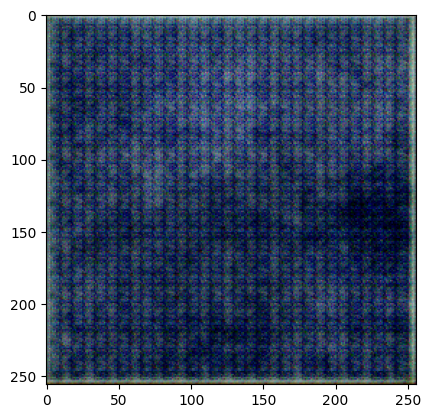

In [24]:
import matplotlib.pyplot as plt
plt.imshow(image_from_noise_vector.permute(1,2,0))

In [26]:
image_from_noise_vector.shape

torch.Size([3, 256, 256])

In [27]:
def tensor_to_webp(tensor):
    # Ensure the tensor is on CPU and detached from the computation graph
    tensor = tensor.cpu().detach()

    # Rescale from [-1, 1] to [0, 255]
    tensor = (tensor + 1) / 2 * 255
    tensor = tensor.clamp(0, 255).byte()

    # Convert to PIL Image
    image = Image.fromarray(tensor.permute(1, 2, 0).numpy())

    # Save as WebP
    webp_buffer = io.BytesIO()
    image.save(webp_buffer, format="WebP", quality=80)  # Adjust quality as needed
    webp_buffer.seek(0)

    return webp_buffer.getvalue()

In [28]:
image = tensor_to_webp(image_from_noise_vector)

In [29]:
image

b'RIFF\xe2F\x00\x00WEBPVP8 \xd6F\x00\x000\xb3\x00\x9d\x01*\x00\x01\x00\x01>m.\x92F$"\xa1\xa1-4-\x10\x80\r\x89e\x00\xbbwNS\xfd\xa4\xac}\xf7\xaf\xdc\x1f\xff\xd66\xba\xff\x8d\xca\xae\xd9\xbe\x85\xff\xe1\xf4\xaf\xf4g\xcf{\xe8\xdb\xfe\x1fM\x97\xa9\x9fF7\xab\xe7\xfc\xcfM\xef@\x0f\xff\xfe\xda\x1f\xc0?\xff\xea\x02\xf0\xdf\x10_O\xf7\xf3\xfe\xdb\xda\xee\xd0\x7f7\xe0\x07\xf8\xef\xec\x7f\xff\xff\xe3\xedW\xfc\xbf\xff\xfe\x01\xfa\xff\xff\xad\xec\x05\xe7\xffR\xe7\x86\xf4\xe6\x80?=\xfc\xdf\xf5\x1b\xfd\x1f\xde\xcfP\xbfF\xffG\xff\xff\xff7\xc0\x07\xf1\x0f\xee\x9f\xbb~\xc6\xf7\x91~\'\xff7\xb0\x1f\xf4?\xcf\x8fxO\xfa?~<\xec\xff5\xff\xbb\xf7\xcf\xe0\x1b\xfcW\xfe\xef\xdf\xffm\xbf\xff\xff\xfd\xfe\x00~\xef\x7f\xff\xff\xe1\xf0\x80=\xfa0\xc0\xecn\x9d\x91G\xbef8\xa8G\x13\xaa\x87\xf4\xe3\x98\xe420\r\xf6\x8f/\xbe\x9fm\x17~YC\x02\xb7\xcd\xf3\'\xd5\xa9\x83?u\xe9F\xc9\xc8W\\\xbe2\xfc\xa1x\xb4\xba&/%7)<5\x94\xc1\x86\x9e\xc9\x14\x05}\x15Eh~\xa6\xf8\xc4,mS\x9aN7\x95\xb7\x9d\xf9\xc0\x9e\xa1\xa0>W0(\xb0=g\xa7\\\x15\xe2\x8f\